# BMIS 342 Final Project

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt



## Loading Data

In [64]:
# Load the dataset
fundraising = pd.read_csv('Fundraising.csv')

## Data Cleaning

In [65]:
# Check for missing values
print("Missing values in each column:")
print(fundraising.isnull().sum())

Missing values in each column:
Row Id             0
Row Id.            0
zipconvert_2       0
zipconvert_3       0
zipconvert_4       0
zipconvert_5       0
homeowner dummy    0
NUMCHLD            0
INCOME             0
gender dummy       0
WEALTH             0
HV                 0
Icmed              0
Icavg              0
IC15               0
NUMPROM            0
RAMNTALL           0
MAXRAMNT           0
LASTGIFT           0
totalmonths        0
TIMELAG            0
AVGGIFT            0
TARGET_B           0
TARGET_D           0
dtype: int64


In [66]:
# Drop unnecessary columns
fundraising = fundraising.drop(['Row Id', 'Row Id.', 'TARGET_D'], axis=1)

## Prediction

In [67]:
# Define predictors and target
X = fundraising.drop('TARGET_B', axis=1)
y = fundraising['TARGET_B']

feature_columns = X.columns

In [62]:
# Partition the data: 60% training, 40% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=12345)

In [68]:
# Feature selection using Random Forest to identify top 5 features
rf = RandomForestClassifier(random_state=12345)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
top5_features = feature_names[sorted_indices[:5]].tolist()
print("Top 5 most impactful features:", top5_features)

Top 5 most impactful features: ['AVGGIFT', 'HV', 'Icavg', 'Icmed', 'RAMNTALL']


In [69]:
# Prepare data subsets
X_train_top5 = X_train[top5_features]
X_val_top5 = X_val[top5_features]

In [70]:
# Scale data for Neural Networks
scaler_all = StandardScaler().fit(X_train)
X_train_scaled = scaler_all.transform(X_train)
X_val_scaled = scaler_all.transform(X_val)

scaler_top5 = StandardScaler().fit(X_train_top5)
X_train_top5_scaled = scaler_top5.transform(X_train_top5)
X_val_top5_scaled = scaler_top5.transform(X_val_top5)

## Model 1: Decision Tree

In [71]:
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
# All features
dt_grid_all = GridSearchCV(DecisionTreeClassifier(random_state=12345), dt_params, cv=5, scoring='f1')
dt_grid_all.fit(X_train, y_train)
dt_all = dt_grid_all.best_estimator_
print("Decision Tree (All Features) Best Params:", dt_grid_all.best_params_)
# Top 5 features
dt_grid_top5 = GridSearchCV(DecisionTreeClassifier(random_state=12345), dt_params, cv=5, scoring='f1')
dt_grid_top5.fit(X_train_top5, y_train)
dt_top5 = dt_grid_top5.best_estimator_
print("Decision Tree (Top 5 Features) Best Params:", dt_grid_top5.best_params_)

Decision Tree (All Features) Best Params: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree (Top 5 Features) Best Params: {'max_depth': 5, 'min_samples_split': 2}


## Model 2: Neural Network

In [ ]:
# Takes 4-5 min to run!

nn_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam']}
# All features
nn_grid_all = GridSearchCV(MLPClassifier(random_state=12345, max_iter=1000), nn_params, cv=5, scoring='f1')
nn_grid_all.fit(X_train_scaled, y_train)
nn_all = nn_grid_all.best_estimator_
print("Neural Network (All Features) Best Params:", nn_grid_all.best_params_)
# Top 5 features
nn_grid_top5 = GridSearchCV(MLPClassifier(random_state=12345, max_iter=1000), nn_params, cv=5, scoring='f1')
nn_grid_top5.fit(X_train_top5_scaled, y_train)
nn_top5 = nn_grid_top5.best_estimator_
print("Neural Network (Top 5 Features) Best Params:", nn_grid_top5.best_params_)

C:\Users\adub0\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adub0\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adub0\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adub0\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

Neural Network (All Features) Best Params: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Neural Network (Top 5 Features) Best Params: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


## Model 3: Logistic Regression

In [73]:
lr_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
# All features
lr_grid_all = GridSearchCV(LogisticRegression(random_state=12345, solver='liblinear'), lr_params, cv=5, scoring='f1')
lr_grid_all.fit(X_train, y_train)
lr_all = lr_grid_all.best_estimator_
print("Logistic Regression (All Features) Best Params:", lr_grid_all.best_params_)
# Top 5 features
lr_grid_top5 = GridSearchCV(LogisticRegression(random_state=12345, solver='liblinear'), lr_params, cv=5, scoring='f1')
lr_grid_top5.fit(X_train_top5, y_train)
lr_top5 = lr_grid_top5.best_estimator_
print("Logistic Regression (Top 5 Features) Best Params:", lr_grid_top5.best_params_)

Logistic Regression (All Features) Best Params: {'C': 10, 'penalty': 'l1'}
Logistic Regression (Top 5 Features) Best Params: {'C': 10, 'penalty': 'l2'}


In [74]:
# Define models dictionary
models = {
    'DT_all': dt_all, 'DT_top5': dt_top5,
    'NN_all': nn_all, 'NN_top5': nn_top5,
    'LR_all': lr_all, 'LR_top5': lr_top5
}

## Evaluation

In [75]:
# Evaluate models with standard metrics
print("\nModel Performance on Validation Set:")
for name, model in models.items():
    if 'NN' in name:
        X_val_use = X_val_scaled if 'all' in name else X_val_top5_scaled
    else:
        X_val_use = X_val if 'all' in name else X_val_top5
    y_pred = model.predict(X_val_use)
    y_prob = model.predict_proba(X_val_use)[:, 1]
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_val, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")


Model Performance on Validation Set:

DT_all:
Accuracy: 0.5248
Precision: 0.5149
Recall: 0.4820
F1-score: 0.4979
AUC: 0.5382

DT_top5:
Accuracy: 0.5232
Precision: 0.5107
Recall: 0.5885
F1-score: 0.5468
AUC: 0.5398

NN_all:
Accuracy: 0.5144
Precision: 0.5030
Recall: 0.5426
F1-score: 0.5221
AUC: 0.5206

NN_top5:
Accuracy: 0.5529
Precision: 0.5370
Recall: 0.6180
F1-score: 0.5747
AUC: 0.5635

LR_all:
Accuracy: 0.5737
Precision: 0.5596
Recall: 0.6000
F1-score: 0.5791
AUC: 0.5950

LR_top5:
Accuracy: 0.5441
Precision: 0.5252
Recall: 0.7016
F1-score: 0.6007
AUC: 0.5665


In [76]:
# Function to calculate cumulative net profit
def calculate_cumulative_net_profit(y_true, y_prob, actual_prior=0.051):
    sorted_indices = np.argsort(y_prob)[::-1]
    y_true_sorted = y_true.values[sorted_indices]
    weight_d = 0.5 / actual_prior  # ~9.8
    weight_nd = 0.5 / (1 - actual_prior)  # ~0.53
    net_profit_adjusted = np.where(y_true_sorted == 1, (13 - 0.68) / weight_d, -0.68 / weight_nd)
    return np.cumsum(net_profit_adjusted)

## Cumulative Net Profit

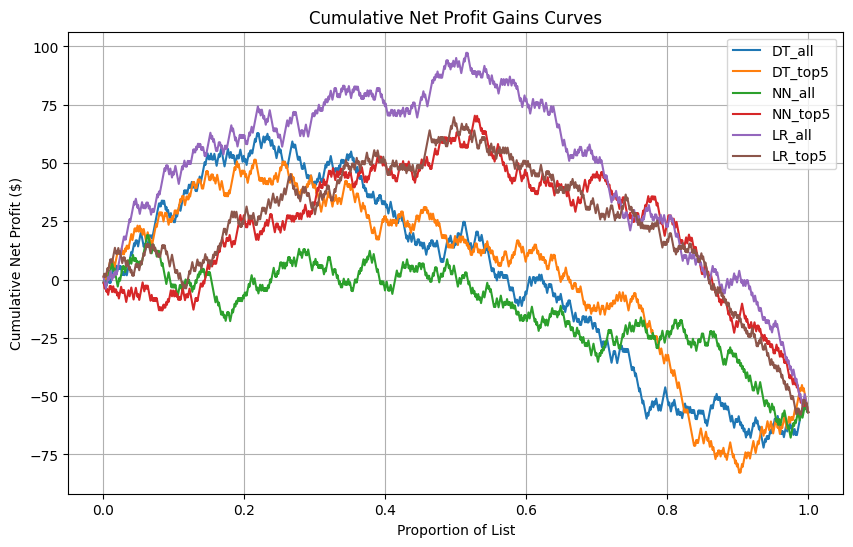

In [77]:
# Calculate and plot cumulative net profit
plt.figure(figsize=(10, 6))
cumulative_profits = {}
for name, model in models.items():
    if 'NN' in name:
        X_val_use = X_val_scaled if 'all' in name else X_val_top5_scaled
    else:
        X_val_use = X_val if 'all' in name else X_val_top5
    y_prob = model.predict_proba(X_val_use)[:, 1]
    cumulative_net_profit = calculate_cumulative_net_profit(y_val, y_prob)
    cumulative_profits[name] = cumulative_net_profit
    plt.plot(np.arange(1, len(cumulative_net_profit) + 1) / len(cumulative_net_profit), 
             cumulative_net_profit, label=name)
plt.xlabel('Proportion of List')
plt.ylabel('Cumulative Net Profit ($)')
plt.title('Cumulative Net Profit Gains Curves')
plt.legend()
plt.grid(True)
plt.savefig('cumulative_net_profit.png')
plt.show()

In [78]:
# Select the best model based on maximum cumulative net profit
max_profits = {name: max(profit) for name, profit in cumulative_profits.items()}
best_model_name = max(max_profits, key=max_profits.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Max Net Profit: ${max_profits[best_model_name]:.2f}")


Best Model: LR_all with Max Net Profit: $97.33


In [79]:
# Predict on FutureFundraising.csv
future_fundraising = pd.read_csv('FutureFundraising.csv')
columns_to_drop = ['Row Id.', 'TARGET_B', 'TARGET_D']  # Keep 'Row Id'
future_fundraising = future_fundraising.drop(columns_to_drop, axis=1, errors='ignore')

In [80]:
# Prepare future data based on best model
if 'top5' in best_model_name:
    X_future = future_fundraising[top5_features]
    if 'NN' in best_model_name:
        X_future = scaler_top5.transform(X_future)
else:
    X_future = future_fundraising
    if 'NN' in best_model_name:
        X_future = scaler_all.transform(X_future)

In [81]:
# Calculate expected net profit
expected_net_profit = P_actual_future * (13 - 0.68) - (1 - P_actual_future) * 0.68
sorted_indices = np.argsort(P_actual_future)[::-1]
cumulative_expected_net_profit = np.cumsum(expected_net_profit[sorted_indices])

## Mailing List Size

In [82]:
# Determine optimal mailing list size
k_max = np.argmax(cumulative_expected_net_profit) + 1
print(f"Recommended number of individuals to mail: {k_max} (out of {len(future_fundraising)})")

Recommended number of individuals to mail: 932 (out of 2000)


In [83]:
future_fundraising = pd.read_csv('FutureFundraising.csv')
future_fundraising = future_fundraising.drop(
    ['Row Id.', 'TARGET_B', 'TARGET_D'],
    axis=1, errors='ignore'
)

# Prepare future data based on best model
if 'top5' in best_model_name:
    X_future = future_fundraising[top5_features]
else:
    X_future = future_fundraising[feature_columns]

# Scale data if the best model is a Neural Network
if 'NN' in best_model_name:
    if 'top5' in best_model_name:
        X_future = scaler_top5.transform(X_future)
    else:
        X_future = scaler_all.transform(X_future)

# Predict probabilities
y_prob_future = best_model.predict_proba(X_future)[:, 1]
P_actual_future = y_prob_future  # Simplified; use your actual calculation if different

# Prepare mailing list
future_fundraising['P_donor'] = P_actual_future

# Sort and select top k_max donors
sorted_indices = future_fundraising['P_donor'].argsort()[::-1]
future_fundraising_sorted = future_fundraising.loc[
    sorted_indices,
    ['Row Id', 'P_donor']
].head(k_max)

print("Future columns:", future_fundraising.columns.tolist())
print("Expected features:", feature_columns.tolist())
print("\nTop Predicted Donors for Mailing Campaign:")
print(future_fundraising_sorted)

Future columns: ['Row Id', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'homeowner dummy', 'NUMCHLD', 'INCOME', 'gender dummy', 'WEALTH', 'HV', 'Icmed', 'Icavg', 'IC15', 'NUMPROM', 'RAMNTALL', 'MAXRAMNT', 'LASTGIFT', 'totalmonths', 'TIMELAG', 'AVGGIFT', 'P_donor']
Expected features: ['zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'homeowner dummy', 'NUMCHLD', 'INCOME', 'gender dummy', 'WEALTH', 'HV', 'Icmed', 'Icavg', 'IC15', 'NUMPROM', 'RAMNTALL', 'MAXRAMNT', 'LASTGIFT', 'totalmonths', 'TIMELAG', 'AVGGIFT']

Top Predicted Donors for Mailing Campaign:
      Row Id   P_donor
1013    1014  0.775977
721      722  0.775139
119      120  0.763839
55        56  0.760207
25        26  0.755174
...      ...       ...
1977    1978  0.507155
1699    1700  0.507125
641      642  0.506952
1546    1547  0.506702
178      179  0.506694

[932 rows x 2 columns]


In [84]:
# Save mailing list
future_fundraising_sorted.to_csv('mailing_list.csv', index=False)
print("\nMailing list saved to 'mailing_list.csv'")


Mailing list saved to 'mailing_list.csv'


## Mailing List Visuals

In [85]:
# Load the mailing_list.csv file
mailing_list = pd.read_csv('mailing_list.csv')

# For demonstration, let's assume k_max is the length of mailing_list
k_max = len(mailing_list)

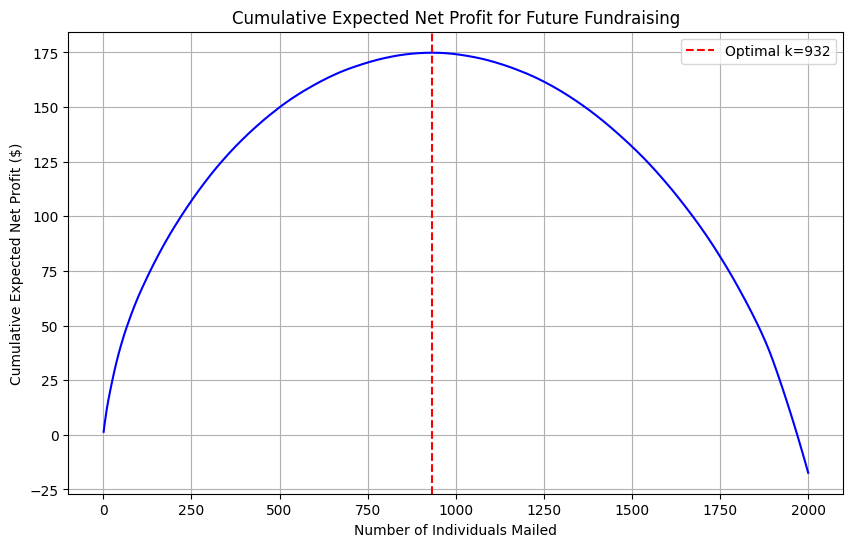

In [86]:
# Plot 1: Cumulative Expected Net Profit
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_expected_net_profit) + 1), cumulative_expected_net_profit, 'b-')
plt.axvline(x=k_max, color='r', linestyle='--', label=f'Optimal k={k_max}')
plt.xlabel('Number of Individuals Mailed')
plt.ylabel('Cumulative Expected Net Profit ($)')
plt.title('Cumulative Expected Net Profit for Future Fundraising')
plt.legend()
plt.grid(True)
plt.show()

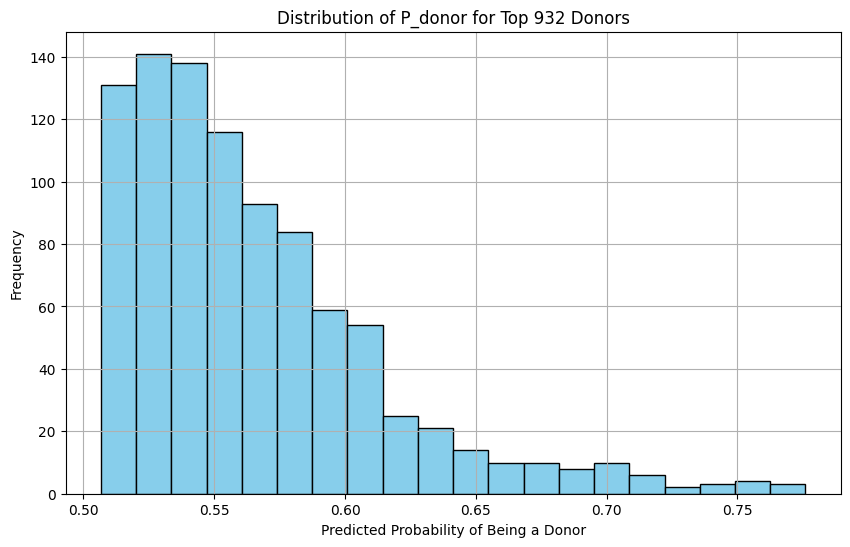

In [87]:
# Plot 2: Histogram of P_donor for Top k_max Donors
plt.figure(figsize=(10, 6))
plt.hist(mailing_list['P_donor'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Being a Donor')
plt.ylabel('Frequency')
plt.title(f'Distribution of P_donor for Top {k_max} Donors')
plt.grid(True)
plt.show()